<a href="https://colab.research.google.com/github/Chandani-Sharma/EDA/blob/main/Copy_of_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis








##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The aim of this project is to analyze two datasets related to the Google Play Store, one containing app metadata such as category, rating, and installs, and another containing user reviews with sentiment analysis. Our objective is to identify key factors for app engagement and success by analyzing patterns and correlations in the data. Specifically, we hope to answer questions such as:


1.   Which app categories have the highest ratings and installs, and what features do they have in common?

2.   How do user sentiments vary across different types of apps and categories?

3.   Can we identify any common themes or issues in user reviews that negatively impact app engagement or success?

By conducting exploratory data analysis (EDA) on these datasets, we aim to provide insights for app developers and publishers on how to improve their products and increase user engagement and satisfaction.







# **GitHub Link -**

Provide your GitHub Link here.
[link text](https:// [link text](https://))

# **Problem Statement**


Problem statement: How can we analyze Play Store app reviews to gain insights into user feedback and app engagement?

1. What is the distribution of app categories in the dataset, and which categories have the most apps?
2. What is the correlation between app rating and number of reviews, and does this vary across different categories?
3. Which app categories have the highest average rating, and which have the lowest?
4. How do the number of installs vary across different app categories, and is there a correlation between installs and ratings?
5. How do the prices of paid apps vary across different categories, and is there a correlation between price and rating?
6. What are the most common positive and negative sentiments expressed by users in app reviews, and how do these vary across different categories?
7. What is the distribution of sentiment polarity in the dataset, and how does this vary across different categories?
8. What are the most common issues or complaints users have with apps, and how do these vary across different categories?
9. Are there any differences in user feedback between free and paid apps, and if so, what are they?
10. Can we identify any common themes or issues in user reviews that negatively impact app engagement or success, and how can these be addressed?

By answering these questions using EDA techniques and analysis of the app metadata and user reviews datasets, we can provide valuable insights for app developers and publishers on how to improve their products and increase user engagement and satisfaction.

# **Business Objective**





The business objective for this EDA project is to identify key factors that contribute to app engagement and success on the Google Play Store. Specifically, we aim to analyze app metadata and user reviews to gain insights into user feedback and sentiments, and to identify common issues and complaints that negatively impact app engagement or success. By doing so, we can provide app developers and publishers with valuable information on how to improve their products, increase user satisfaction, and ultimately increase their app's success on the Play Store.

# **Data Analysis**

## ***Data Preparation and Cleaning*** 

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



### Dataset Loading

In [ ]:
# Load Dataset

# Load app metadata dataset
app_df = pd.read_csv('/content/Play Store Data (1).csv')
app_df = app_df.copy()

# Load user reviews dataset
user_df = pd.read_csv('/content/User Reviews (2).csv')


### Dataset First View

In [ ]:
# Dataset First Look

# Display first few rows of app metadata dataset
app_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Get the number of rows and columns in the app metadata dataset
app_df.shape

(10841, 13)

In [ ]:
# Display first few rows of user reviews dataset
user_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Get the number of rows and columns in the user reviews dataset
user_df.shape

(44260, 5)

### Understanding Dataset 

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Check for duplicate rows in app dataset
app_df.duplicated().sum()

483

In [ ]:
# drop duplicate values and make this changes in original app dataset itself
app_df.drop_duplicates(inplace = True)
app_df.shape

(10358, 13)

#### Missing Values/Null Values

In [ ]:
# Check for missing values in app metadata dataset
app_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Check for missing values in user_review dataset
print(user_df.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


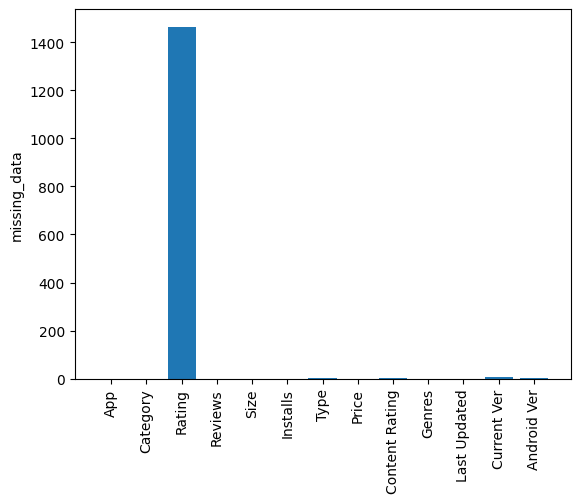

In [ ]:
# Visualizing the missing values

# Calculate the sum of missing values for each column
missing_data = app_df.isnull().sum()

# Create a bar chart of the sum of missing values for the app metadata dataset
plt.bar(missing_data.index, missing_data.values)
plt.xticks(rotation=90)
plt.ylabel('missing_data')
plt.show()


Rating column has the highest number of datas missing so examining the distribution of values in the Rating column can help to determine the best approach to handle the missing data. Since the percentage of missing data is relatively small (13-14%), using different methods, such as mean, median, or mode imputation can also be considered. Evaluating if there is a pattern in the missing values, for example, if the missing values occur mostly in a specific category or at a particular time, which could provide insights into why the data is missing and help us decide on the best imputation method.

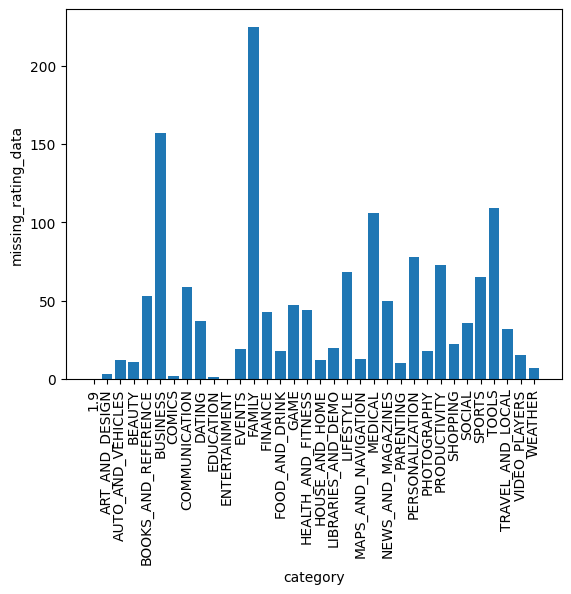

In [ ]:
# Group the data by Category and calculate the sum of missing values in Rating column
missing_rating = app_df.groupby('Category')['Rating'].apply(lambda x : sum(x.isna()))

# Create a bar plot to visualize the sum of missing values for each category
plt.bar(missing_rating.index, missing_rating.values)
plt.xticks(rotation = 90)
plt.ylabel('missing_rating_data')
plt.xlabel('category')
plt.show()

This bar graph help us infer that the "Rating" column has very few missing values in certain categories, such as Entertainment, Art_and_design, Comics, and Education. This information can be useful for further analysis or modeling, as we can focus on these categories for a more accurate analysis of the impact of ratings on app success. It also suggests that developers in these categories may be more diligent in providing complete information about their apps, which could be a positive indicator for potential users.

### Data Cleaning

In [ ]:
# Dataset Info
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#cleaning category  column in app dataset
app_df['Category'] = [name.replace('_',' ') for name in app_df.Category]

#irrelevant data 
app_df = app_df.drop(app_df[app_df['Rating'] == 19].index) 

In [ ]:
# converting numeric column into purely numeric 
app_df['Reviews'] = pd.to_numeric(app_df.Reviews, errors = 'coerce')

# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
# Loop for each char in chars_to_remove
    for char in chars_to_remove:
# Replace the character with an empty string
     app_df[col] = app_df[col].apply(lambda x: x.replace(char,''))

# clean the 'Size' data and change the type 'object' to 'float'
""" As sizes are represented in 'M' and 'k', we remove 'M'
and convert 'k'/kilobytes into megabytes"""
    
def clean_size(size):
    cleaned_data = []
    for s in size:
        s = s.replace('M', '')
        s = s.replace(',', '')
        s = s.replace('K', '')
        if s.isdigit():
            s = float(s)
        elif s == 'Varies with device':
            s = float(0)
        else:
            s = float('nan')
        cleaned_data.append(s/1024)
    return cleaned_data


app_df['Size'] = clean_size(app_df['Size'])
app_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            6495 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [ ]:
# Convert Installs and Price column to numeric data type

app_df['Installs'] = pd.to_numeric(app_df['Installs'], errors='coerce')
app_df['Price'] = pd.to_numeric(app_df['Price'], errors='coerce')

print(app_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            6495 non-null   float64
 5   Installs        10357 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB
None


## **Exploring Data with Visulaization**

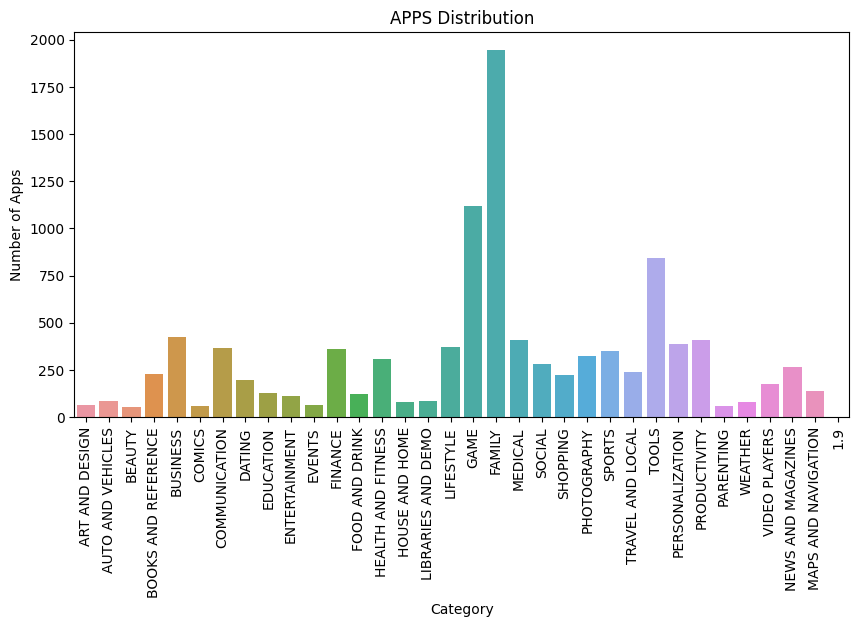

In [ ]:
#Finding which categroy has highest number of apps using bargraph
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data = app_df)
plt.title('APPS Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Family category has the highest number of apps, it could be inferred that:

- Family-oriented apps are in high demand in the market, and developers should focus more on developing apps in this category to gain more profit and success.

- It could also indicate a potential gap in the market for other categories of apps that are currently not being developed as much.

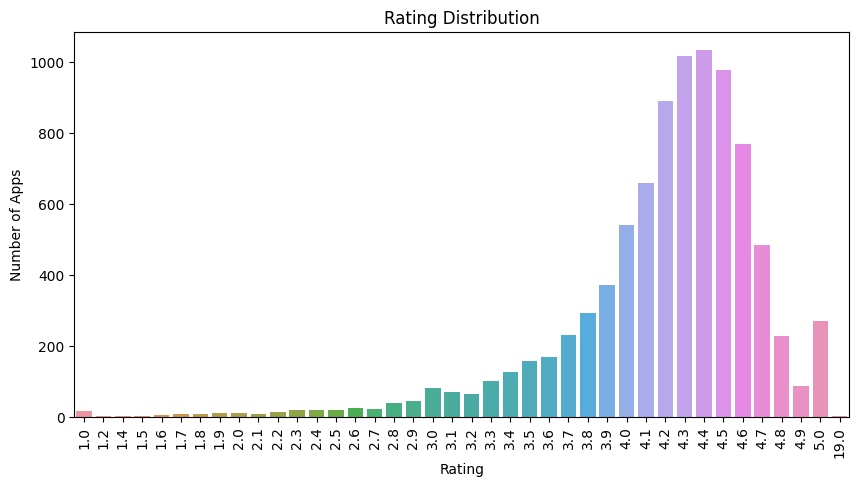

In [ ]:
# To know what is the ratings of apps on average and how is it ditributed amongst different apps.
import warnings
warnings.filterwarnings("ignore")
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=app_df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

- This shows most apps are high rated i.e having rating of 4 and above and very few are below 3.This means that the majority of the apps in the dataset are well-received by users and have a good overall rating. 
-This could be indicative of the fact that the apps in the dataset are of good quality and are meeting the needs and expectations of users. However, it's important to keep in mind that this inference is based solely on the rating distribution plot and should be further validated by analyzing other factors as well.






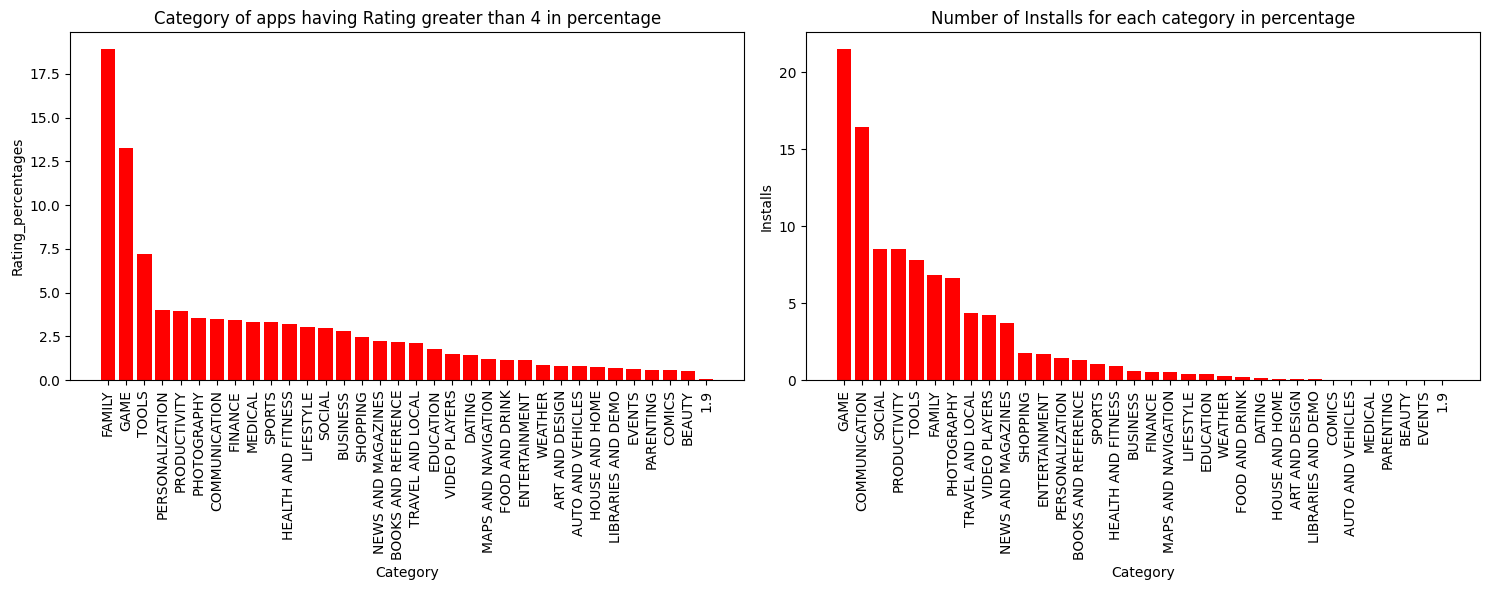

In [ ]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.3)
# First subplot: Category of apps having Rating greater than 4
category = app_df[app_df['Rating'] >= 4].groupby('Category')['Rating'].sum().sort_values(ascending = False)
total_rating = category.sum()
rating_percentages = round((category / total_rating) * 100, 2)
ax[0].bar(category.index, rating_percentages, color = 'red')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Rating_percentages')
ax[0].set_title('Category of apps having Rating greater than 4 in percentage')
ax[0].set_xticklabels(category.index, rotation=90)

# Second subplot: Number of Installs for each category in percentage
category = app_df.groupby('Category')['Installs'].sum().sort_values(ascending = False)
category = category/app_df['Installs'].sum() *100
ax[1].bar(category.index, category.values, color = 'red')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Installs')
ax[1].set_title('Number of Installs for each category in percentage')
ax[1].set_xticklabels(category.index, rotation=90)
# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


- The analysis indicates that users are most satisfied with apps in the Family, Games, Tools, and Personalization categories, as these categories have the highest ratings above 4. These categories also have a high number of installations, indicating that users frequently download and use apps in these categories.

- Additionally, the Family and Finance categories have a high percentage of satisfied users, despite having a relatively low number of installations compared to other categories. However, the Communication, Travel, and Local categories have a high number of installations but a lower percentage of satisfied users. Developers in these categories may need to focus on improving the user experience to increase satisfaction.


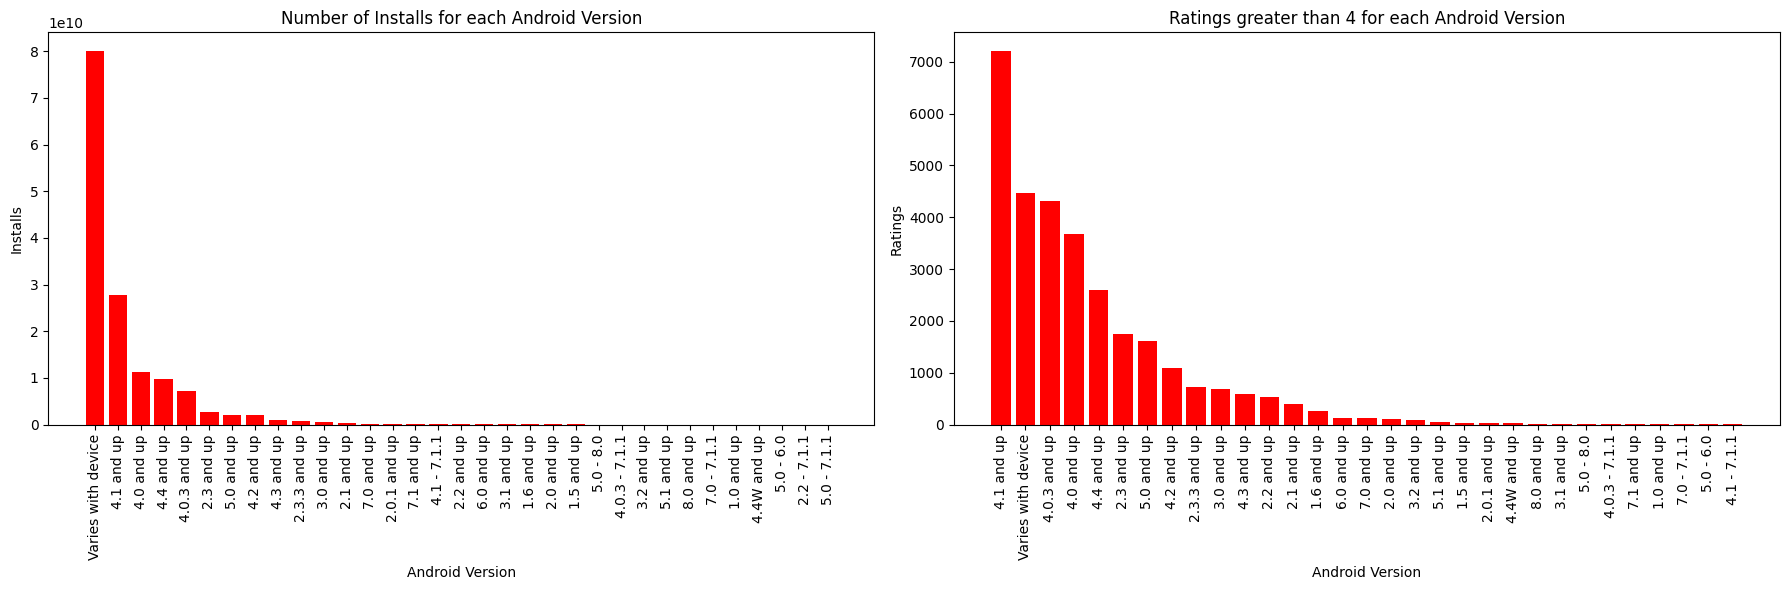

In [ ]:
#which Android Version has highest Installed apps
fig, ax = plt.subplots(1, 2, figsize = (18,6))

category = app_df.groupby('Android Ver')['Installs'].sum().sort_values(ascending = False)
ax[0].bar(category.index, category.values, color = 'red')
ax[0].set_ylabel('Installs')
ax[0].set_xlabel('Android Version')
ax[0].set_title('Number of Installs for each Android Version')
ax[0].set_xticklabels(category.index, rotation = 90)

category = app_df[app_df['Rating'] >= 4].groupby('Android Ver')['Rating'].sum().sort_values(ascending = False)
ax[1].bar(category.index, category.values, color = 'red')
ax[1].set_ylabel('Ratings')
ax[1].set_xlabel('Android Version')
ax[1].set_title('Ratings greater than 4 for each Android Version')
ax[1].set_xticklabels(category.index, rotation = 90)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

- From the comparison of app installs and ratings across different Android versions, it can be inferred that the "Varies with device" version is the most popular among users,indicating that users are more likely to download apps that do not have specific requirements for the Android version. 
-The high ratings for versions 4.1 and above and "Varies with device" suggest that users are generally satisfied with apps that are compatible with these versions. App developers may want to consider optimizing their apps for these versions to improve user satisfaction and ratings
- The relatively low number of installs for versions 4.0.3 and up suggests that users may not be as interested in downloading apps that require this version of Android. However, the fact that this version still has a decent rating suggests that users who do use it are generally satisfied with the apps available. 
- Overall, developers may want to consider optimizing their apps for the "Varies with device" and 4.1 and above versions to reach the largest audience and potentially get higher ratings.

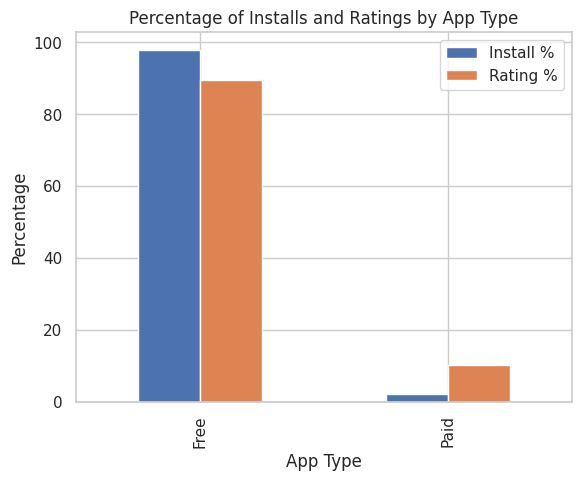

In [ ]:

# Calculate the percentage of installs and ratings for each app type
install = app_df.groupby('Type')['Installs'].sum() / app_df['Installs'].sum() * 100
rating = app_df.groupby('Type')['Rating'].sum() / app_df['Rating'].sum() * 100

# Create a dataframe with the two percentages
df = pd.DataFrame({'Install %': install, 'Rating %': rating})

# Plot the grouped bar chart
df.plot(kind='bar')
plt.title('Percentage of Installs and Ratings by App Type')
plt.xlabel('App Type')
plt.ylabel('Percentage')
plt.show()








- The fact that the free app type has more installs and ratings can be a valuable insight for businesses looking to launch new apps. It suggests that users are more willing to try out and engage with free apps, potentially indicating a larger market for free apps. This insight can inform decisions around app pricing and monetization strategies.
- Furthermore, the higher ratings for free apps could indicate that users have a more positive perception of free apps compared to paid apps. This could be due to various factors, such as the user's expectation for quality and functionality in a paid app being higher than that of a free app.


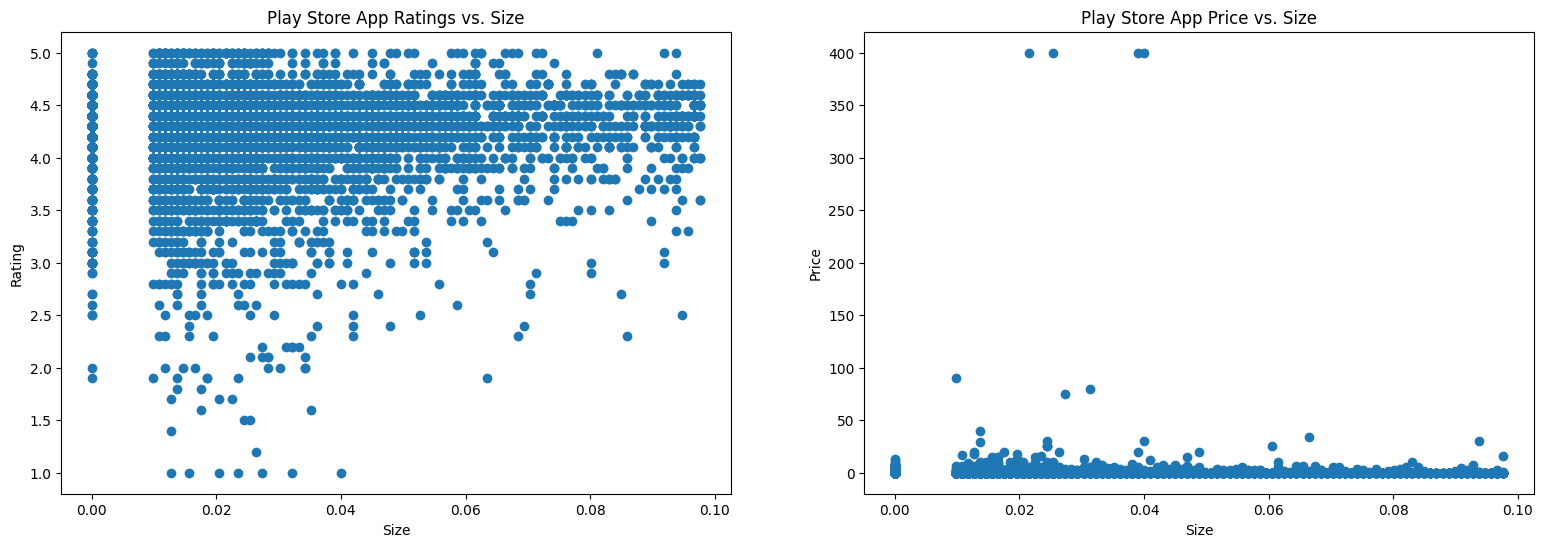

In [ ]:

# Create scatter plot
fig, ax = plt.subplots(1, 2, figsize=(19, 6))

# Create scatter plot for Ratings vs. Size
scatter = ax[0].scatter(app_df['Size'], app_df['Rating'])
ax[0].set_xlabel('Size')
ax[0].set_ylabel('Rating')
ax[0].set_title('Play Store App Ratings vs. Size')

# Create scatter plot for Price vs. Size
scatter = ax[1].scatter(app_df['Size'], app_df['Price'])
ax[1].set_xlabel('Size')
ax[1].set_ylabel('Price')
ax[1].set_title('Play Store App Price vs. Size')

plt.show()


Based on exploratory data analysis of the Play Store app data, some interesting conclusions about the relationship between app size, price, and rating that can be infer:


*  There appears to be a weak relationship between app size and price. It indicates that the size of the app does not have a significant impact on its price, and other factors such as features, functionality, and competition may be more influential in determining app pricing.
*  The highest concentration of data points is located at the top of the plot, indicating that most apps have high ratings, regardless of their size. However, majority apps are below 40MB in the dataset and majority of these apps are high rated.
This finding could be valuable for app developers, who may want to pay extra attention to the quality and performance of their smaller apps to ensure they are meeting user expectations but there are also other factors, such as app functionality and user experience, that play a role in determining ratings.

Overall, these visualizations suggest that the size of an app does not have a strong impact on its price or its rating, but there may be some differences in the distribution of ratings between smaller and larger apps.

In [ ]:
# correlation
app_df.corr()

<ipython-input-53-751331ebbeca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  app_df.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068732,0.012800,0.050886,-0.022355
Reviews,0.068732,1.000000,0.021819,0.634997,-0.009417
Size,0.012800,0.021819,1.000000,-0.067793,0.008906
Installs,0.050886,0.634997,-0.067793,1.000000,-0.011147
Price,-0.022355,-0.009417,0.008906,-0.011147,1.000000


<ipython-input-54-2935f67acd3f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(app_df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)


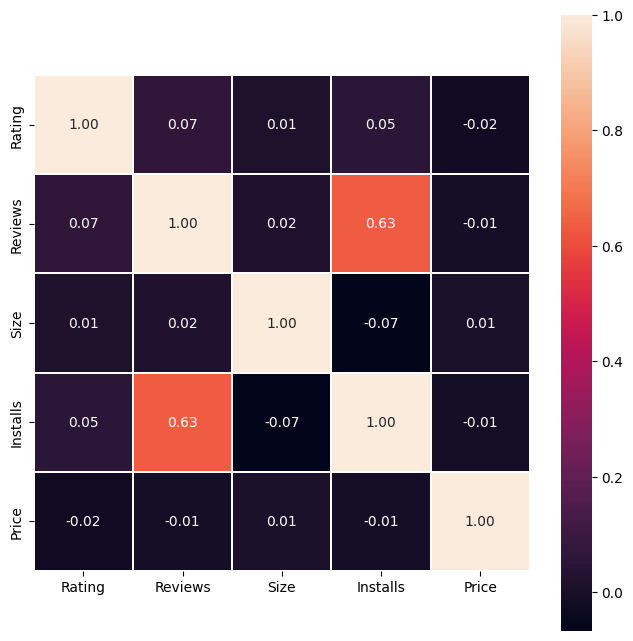

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(app_df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

- The correlation table shows the correlation coefficients between different variables in the Play Store app dataset. The diagonal line of the table shows the correlation of each variable with itself, which is always 1.

- From the table, we can see that Reviews and Installs have a relatively high positive correlation coefficient of 0.635, which means that apps with more reviews tend to have more installs. Rating and Reviews have a small positive correlation coefficient of 0.069, indicating that apps with higher ratings do not necessarily have more reviews.

- Size and Installs have a negative correlation coefficient of -0.068, meaning that larger apps tend to have fewer installs. Price has a very weak correlation with the other variables, with coefficients close to zero, which suggests that there is no significant relationship between app price and the other variables.

- Overall, the correlation table suggests that reviews and installs are the most important factors that affect the success of a Play Store app.

In [ ]:
# Join the two dataframes
merged_df = pd.merge(app_df,user_df)
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART AND DESIGN,3.9,967.0,0.013672,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART AND DESIGN,3.9,967.0,0.013672,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART AND DESIGN,3.9,967.0,0.013672,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART AND DESIGN,3.9,967.0,0.013672,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART AND DESIGN,3.9,967.0,0.013672,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

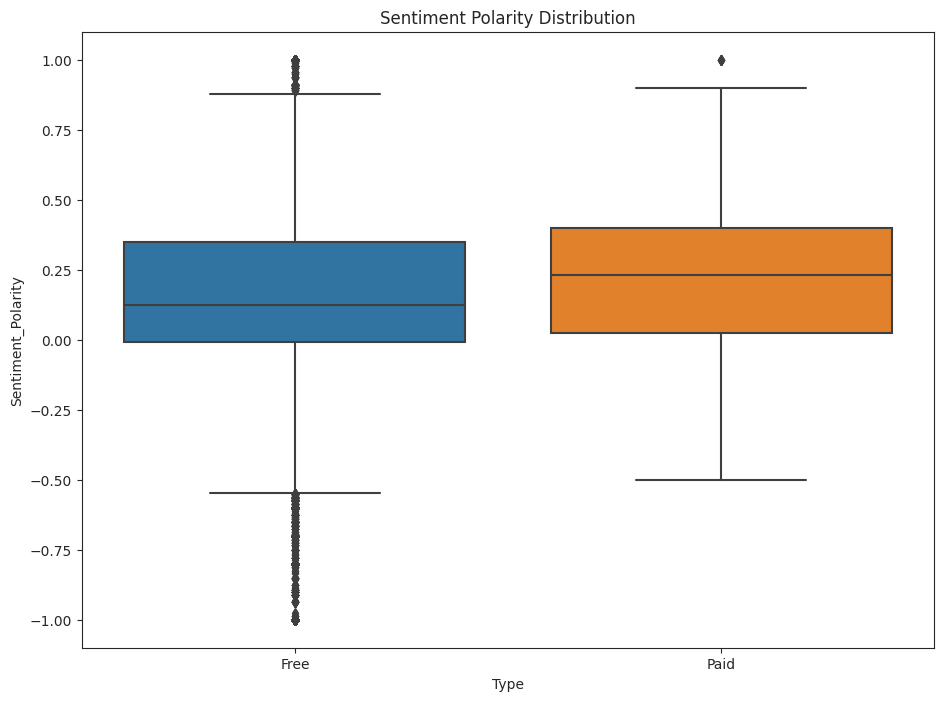

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type' , y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

- By plotting sentiment polarity scores of user reviews for paid and free apps, it can be observed that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis, though it also has some outliers on positive side too. This could be attributed to the fact that users have low expectations from free apps and hence, are more forgiving towards small shortcomings as compared to paid app. 
- Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with previous observation.
- Overall, this analysis suggests that app developers should strive to offer high-quality features in their apps, particularly for free apps, to avoid negative feedback from users.

In [ ]:
#1. What is the top 5 apps on the basis of installs?
df = app_df.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
341,Hangouts,COMMUNICATION,4.0,3419249.0,0.000000,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
3928,YouTube,VIDEO PLAYERS,4.3,25623548.0,0.000000,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483.0,0.000000,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112.0,0.000000,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1700,Subway Surfers,GAME,4.5,27723193.0,0.074219,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [ ]:
# 2. What is the top 5 reviewed apps?
df = app_df.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews
4473,Instagram,SOCIAL,4.5,199664676.0
3467,Facebook,SOCIAL,4.1,156286514.0
6886,Subway Surfers,GAME,4.5,138606606.0
7755,WhatsApp Messenger,COMMUNICATION,4.4,138228988.0
5153,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,113289425.0


In [ ]:
# 3. What is the top 5 expensive apps?
df = app_df.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,NaN,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,0.040039,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0.0,0.039062,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,0.025391,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201.0,NaN,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


In [ ]:
# 4. What is the top 3 most installed apps in Game category?
df = app_df[app_df['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703.0,0.074219,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094.0,0.074219,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352.0,0.074219,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [ ]:
# 5. Which 5 high rated apps?
df = app_df.sort_values(by = ['Rating', 'Reviews'], ascending = [False,False])
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10357,Ríos de Fe,LIFESTYLE,5.0,141.0,0.014648,1000.0,Free,0.0,Everyone,Lifestyle,"March 24, 2018",1.8,4.1 and up
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104.0,NaN,1000.0,Free,0.0,Everyone,Finance,"August 7, 2018",2.1.0,4.1 and up
8058,Oración CX,LIFESTYLE,5.0,103.0,NaN,5000.0,Free,0.0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1 and up
6823,Barisal University App-BU Face,FAMILY,5.0,100.0,0.009766,1000.0,Free,0.0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up
9496,Master E.K,FAMILY,5.0,90.0,0.000000,1000.0,Free,0.0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up


# **Conclusion**

Based on the analysis of the Play Store app data, following are some key insights that could be helpful for app developers:

- top 5 apps based on Installs and Reviews are from COMMUNICATION, GAMES AND SOCIAL, even though the amount of available apps from these categories are twice as much lesser than the category FAMILY
- Users are most satisfied with apps in the FAMILY, Games, Tools, and Personalization categories, as these categories have the highest ratings above 4.
- Users are more likely to download apps that do not have specific requirements for the Android version, and app developers should optimize their apps for the "Varies with device" and 4.1 and above versions to reach the largest audience and potentially get higher ratings.
- The fact that the free app type has more installs and ratings suggests that users are more willing to try out and engage with free apps, potentially indicating a larger market for free apps.
- App size does not have a strong impact on app price or its rating, but there may be some differences in the distribution of ratings between smaller and larger apps.
- Reviews and installs are the most important factors that affect the success of a Play Store app.
- Free apps receive a lot of harsh comments, but users have low expectations from free apps and hence, are more forgiving towards small shortcomings as compared to paid app. Reviews for paid apps appear never to be extremely negative, indicating that paid apps are of higher quality than free apps on average.
- Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps and are mostly free.

Overall, app developers should focus on developing apps in the  GAME, SOCIAL, COMMUNICATION and TOOL categories, optimize their apps for the "Varies with device" and 4.1 and above versions, pay extra attention to the quality and performance of their smaller apps, and strive to receive more reviews to increase installs. Additionally, they should consider launching free apps to tap into the potentially larger market for such apps, but be aware that users may have higher expectations from paid apps.




